## Introduction

<p>This project aims to wrangle (gather, assess and clean) real world data from a range of sources and in a variety of formats, through analyses and visualizations using Python and its libraries and/or SQL.</p> 

<p>The dataset to be wrangled (and analyzed and visualized) "is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent."" - Udacity Project Overview.</p>

## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessment">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#storage">Data Storage</a></li>
<li><a href="#analysis">Analyses and Vitualization</a></li>
</ul>

In [82]:
#importing all necessary libraries to complete this project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
import seaborn as sns
import os
import requests
import re
from functools import reduce
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

<a id = 'gathering'></a>
## Data Gathering

The first table (twitter-archive-enhanced.csv) is manually obtained from the internet and opened into a pandas data drame programmatically.

In [83]:
#load the 'twitter-archive-enhanced.csv' table into a pandas data frame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

The second table is downloaded programmatically from Udacity's server into a folder (image-predictions) using the requests library and its URL, written locally, and then loaded into a pandas Data Frame.

In [84]:
#create a folder called 'image-predictions' if the folder does not exist already
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)

In [85]:
#get the image-predictions data through its url and using the python requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#write the response of the above request into image-predictions.tsv
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [86]:
#load the image-predictions.tsv file into a pandas data frame
image_predictions = pd.read_csv('image-predictions/image-predictions.tsv', sep='\t')

The third table is downloaded locally from the internet as 'tweet-json.txt', read line by line into a python list, and then loaded into a pandas Data Frame.

In [87]:
# read the tweet-json.txt file line by line and get the 'id_str', 'retweet_count', and 'favorite_count', then store in a python list called df_list
df_list = []
with open ('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({
            'id_str': id_str, 
            'retweet_count': retweet_count, 
            'favorite_count': favorite_count 
        })


In [88]:
#load df_list into a pandas data frame
tweet_data = pd.DataFrame(df_list, columns=['id_str', 'retweet_count', 'favorite_count'])

<a id = 'assessment'></a>
## Data Assessment

Visual Assessment

In [89]:
#displays first 25 observations
twitter_archive.head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [90]:
#displays 25 random observations from the table
twitter_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
391,826204788643753985,NaN,NaN,2017-01-30 23:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Here's a little more info on Dew, your favorit...",NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/kentuc...,13,10,None,doggo,None,None,None
566,802247111496568832,NaN,NaN,2016-11-25 20:26:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
1381,700890391244103680,NaN,NaN,2016-02-20 03:51:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's dapper af. His owners want ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700890391...,11,10,Chet,None,None,None,None
252,844973813909606400,NaN,NaN,2017-03-23 18:07:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brady. He's a recovering alcoholic. De...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844973813...,12,10,Brady,None,None,None,None
107,871762521631449091,NaN,NaN,2017-06-05 16:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871762521...,12,10,Rover,None,None,pupper,None
207,852553447878664193,NaN,NaN,2017-04-13 16:05:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jarod. He likes having his belly brush...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,None,None,None,None
868,761750502866649088,NaN,NaN,2016-08-06 02:27:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Tristan do not speak to me wit...",6.853251e+17,4.196984e+09,2016-01-08 05:00:14 +0000,https://twitter.com/dog_rates/status/685325112...,10,10,None,None,None,None,None
999,748220828303695873,NaN,NaN,2016-06-29 18:25:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,NaN,NaN,NaN,https://vine.co/v/iiLjKuYJpr6,13,10,None,None,None,None,None
216,850753642995093505,NaN,NaN,2017-04-08 16:54:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/850753642...,11,10,Kyle,None,None,None,None


In [91]:
#displays last 25 observations on the table
twitter_archive.tail(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2331,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288...,8,10,None,None,None,None,None
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2334,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None


In [92]:
#displays first 25 observations on the table
image_predictions.head(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [93]:
#displays 25 random observations from the table
image_predictions.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
821,693095443459342336,https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg,1,ice_lolly,0.660099,False,neck_brace,0.039563,False,Yorkshire_terrier,0.033488,True
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
1455,777621514455814149,https://pbs.twimg.com/media/Csqqoo5WEAAMTVW.jpg,1,chow,0.999823,True,Norwich_terrier,0.000056,True,Pomeranian,0.000028,True
14,666094000022159362,https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg,1,bloodhound,0.195217,True,German_shepherd,0.078260,True,malinois,0.075628,True
378,673240798075449344,https://pbs.twimg.com/media/CVfU7KLXAAAAgIa.jpg,1,Airedale,0.443004,True,brown_bear,0.114162,False,Chesapeake_Bay_retriever,0.094639,True
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True
1854,841077006473256960,https://pbs.twimg.com/media/C6wbE5bXUAAh1Hv.jpg,1,Brittany_spaniel,0.962985,True,Blenheim_spaniel,0.014820,True,clumber,0.009557,True
1191,739932936087216128,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,1,redbone,0.243904,True,beagle,0.210975,True,vizsla,0.076443,True
667,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
793,690735892932222976,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1,golden_retriever,0.883229,True,Labrador_retriever,0.109635,True,kuvasz,0.002795,True


In [94]:
#displays the last 25 observations on the table
image_predictions.tail(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2050,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2053,887705289381826560,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,basset,0.821664,True,redbone,0.087582,True,Weimaraner,0.026236,True
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,1,French_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True


In [95]:
#displays first 25 observations on the table.
tweet_data.head(25)

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [96]:
#displays 25 random observations from the table.
tweet_data.sample(25)

,id_str,retweet_count,favorite_count
1970,673240798075449344,798,1510
1271,709207347839836162,6567,13755
324,833863086058651648,2729,14661
555,803638050916102144,4828,12270
2244,667878741721415682,127,409
1411,698907974262222848,699,2787
1162,723179728551723008,2110,5761
2295,667073648344346624,134,425
1061,741067306818797568,3520,10342
1893,674742531037511680,55,527


In [97]:
#displays the last 25 observations on the table.
tweet_data.tail(25)

,id_str,retweet_count,favorite_count
2329,666353288456101888,77,229
2330,666345417576210432,146,307
2331,666337882303524864,96,204
2332,666293911632134144,368,522
2333,666287406224695296,71,152
2334,666273097616637952,82,184
2335,666268910803644416,37,108
2336,666104133288665088,6871,14765
2337,666102155909144576,16,81
2338,666099513787052032,73,164


#### Programmatic Assessment

In [98]:
#displays a summary information about the table, including numbers of columns, rows, and non-empty values, and the data type of each variable
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [99]:
#displays all duplicated observations
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [100]:
#returns the number of occurences of each value in the `source` column
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [101]:
#returns the num of occurences of each value in the `name` column
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [102]:
#returns 25 random values from the `name` column
twitter_archive['name'].sample(25)

1731      Willie
2202        None
1410        None
1532        None
1093        None
395         None
1506        None
1123     Crystal
469        Betty
2054        None
408     Crawford
1733       Rinna
1937        Obie
1401        None
24          None
1293        None
714        Balto
1234        None
783      Maximus
880        Atlas
1578      Tyrone
1712        None
1404     Calbert
535         Cali
229        Jerry
Name: name, dtype: object

In [103]:
#returns the number of occurences for each value in the `rating_denumerator ` column
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [104]:
#returns the number of occurences for each value in the `rating_denumerator ` column
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [105]:
#displays a summary information about the table, including numbers of columns, rows, and non-empty values, and the data type of each variable
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [106]:
#return the values of the `img_num` column sorted in an ascending order
image_predictions['img_num'].sort_values()

0       1
1295    1
1294    1
1293    1
1292    1
       ..
1978    4
1496    4
1768    4
1713    4
2040    4
Name: img_num, Length: 2075, dtype: int64

In [107]:
#returns 10 random samples of values from the `jpg_url` column
image_predictions['jpg_url'].sample(10)

1089    https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg
550     https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg
954     https://pbs.twimg.com/media/Ccl0-HVVAAAf8aK.jpg
270     https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg
951     https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg
1095    https://pbs.twimg.com/media/Cf4bcm8XEAAX4xV.jpg
1167    https://pbs.twimg.com/media/CjWMezdW0AErwU3.jpg
738     https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg
1772    https://pbs.twimg.com/media/C31pCN4UcAAOLNH.jpg
897     https://pbs.twimg.com/media/CbYac83W4AAUH1O.jpg
Name: jpg_url, dtype: object

In [108]:
#displays a summary information about the table, including numbers of columns, rows, and non-empty values, and the data type of each variable
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [109]:
#returns 10 random observations from the table.
tweet_data.sample(10)

,id_str,retweet_count,favorite_count
105,871879754684805121,11918,39090
209,852189679701164033,1741,12217
450,818627210458333184,8564,24597
1467,694183373896572928,1040,3236
1371,701981390485725185,1106,3755
1349,704054845121142784,1028,3201
709,784826020293709826,3712,11310
698,786286427768250368,3352,8930
1949,673686845050527744,479,1544
2055,671355857343524864,119,508


In [110]:
#returns the values of the `retweet_count` column sorted in an ascending order
tweet_data['retweet_count'].sort_values()

290         0
1293        2
273         3
341         3
112         3
        ...  
816     52360
1077    52360
259     56625
533     56625
1037    79515
Name: retweet_count, Length: 2354, dtype: int64

In [111]:
#returns the values of the `favorite_count` column sorted in an ascending order
tweet_data['favorite_count'].sort_values()

484          0
585          0
164          0
588          0
909          0
         ...  
134     106827
533     107015
65      107956
1037    131075
412     132810
Name: favorite_count, Length: 2354, dtype: int64

### Summary of Assesment
#### Quality
##### `twitter_archive` table
* Some entries are retweets and replies.
* `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_statustimestamp` columns are unnecessary for the analysis of `original tweets`
* The `source` variable contains html formating
* +0000 is redundant information in in `timestamp`
* Erroneous data types in `tweet_id` and `timestamp` columns
* Variable `floofer` should be `floof`, and likewise it values.




##### `image_predictions` table
* Comlumn labels are unclear
* Text in `p1`, `p2`, and `p3` sometimes start with an uppercase letter, lowercase other times, and underscores are use in place of space, and otherwise.
* `tweet_id` is a string not intiger

##### `tweet_data` table
* `id_str` variable should be named `tweet_id` instead, to be consistent with the other tables.

#### Tidiness
* One variable 'dog stage' in four columns (doggo, floofer, pupper, puppo) in `twitter_archive` table.
* All three tables should be merged into one table.

<a id = 'cleaning'></a>
## Data Cleaning 
Next, I clean up the data for analysis by eliminating or modifying any data that is erroneous, incomplete, irrelevant, redundant, or improperly formatted. When it comes to data analysis, this data is usually not necessary or beneficial because it can slow down the process or produce inaccurate results.

#### Quality

In [112]:
#makes copies of the three dataframes
twit_archive_clean = twitter_archive.copy()
image_pred_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

##### 1. `twitter_archive` table: Some entries are retweets and replies.

__Define__

Create a list for each of retweests and replies using the indices of non-empty values of `retweet_status_id` and `in_reply_to_status_id` variables, and drop the rows using the `drop()` function.

__Code__

In [113]:
#get lists of the indices of rows with retweets and replies and store in `retweet_index` and `reply_index` variables respectively
retweet_index = twit_archive_clean[twit_archive_clean['retweeted_status_id'].notnull()].index
reply_index = twit_archive_clean[twit_archive_clean['in_reply_to_status_id'].notnull()].index

In [114]:
#remove rows with retweets and replies using their indices
twit_archive_clean.drop(index= retweet_index, axis=0, inplace = True)
twit_archive_clean.drop(index= reply_index, axis=0, inplace = True)

__Test__

In [115]:
#checks for any non empty value in retweet_status_id column
twit_archive_clean['retweeted_status_id'].notnull().sum()

0

In [116]:
#checks for any non-empty vlaue in in_reply_to_status_id column
twit_archive_clean['in_reply_to_status_id'].notnull().sum()

0

##### 2. twitter_archive: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_statustimestamp` columns are unnecessary for the analysis of `original tweets`

__Define__

Store `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_statustimestamp` columns in a list and remove them from the table using the drop() fucntion.

__Code__

In [117]:
#store the unnecessary columns in a list
drop_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ]

In [118]:
#removes the unnecessary columns
twit_archive_clean.drop(drop_list, axis = 1, inplace = True)

__Test__

In [119]:
#displays first 5 observations with headers to confirm the previous action.
twit_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### 3. `twitter_archive` table: The `source` column contains html formating

__Define__

Use regular expressions to extract the `source` values from the html formating, using the string.extract() function.

__Code__

In [120]:
#extracts the values of source variable from the html formating
twit_archive_clean['source'] = twit_archive_clean['source'].str.extract('>([\w\W\s]*)<', expand  = True)

__Test__

In [121]:
#displays the first 10 samples of the twit_archive_clean table
twit_archive_clean['source'].head(10)

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
5    Twitter for iPhone
6    Twitter for iPhone
7    Twitter for iPhone
8    Twitter for iPhone
9    Twitter for iPhone
Name: source, dtype: object

In [122]:
#displays counts for each value in source column
twit_archive_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

##### 4. `twitter_archive` table: +0000 is redundant information in in `timestamp`

__Define__

Strip the last 6 characters of the values of `timestamp` column using the str.strip() fucntion

__Code__

In [123]:
#strips the last 6 charcters of the timestamp variable
twit_archive_clean['timestamp'] = twit_archive_clean['timestamp'].str[:-6].str.strip()

__Test__

In [124]:
#displays random samples of the timestamp column
twit_archive_clean['timestamp'].sample(10)

1020    2016-06-25 17:31:25
1575    2016-01-14 03:28:06
1932    2015-12-08 00:37:11
2171    2015-11-25 01:35:25
930     2016-07-16 22:55:55
445     2017-01-11 17:01:16
1313    2016-03-07 18:09:06
2201    2015-11-23 04:21:26
1286    2016-03-11 21:15:02
2192    2015-11-23 23:23:31
Name: timestamp, dtype: object

##### 5. `twitter_archive` table: Erroneous data types in `tweet_id` and `timestamp` columns

__Define__

Change the data types of `tweet_id` and `timestamp` variables to `str` and `datetime` using the astype() and to_datetime() fuctions respective.

__Code__

In [125]:
#changes the data type of the tweet_id column to string
twit_archive_clean['tweet_id'] = twit_archive_clean['tweet_id'].astype(str)
#chnages the data tyoe of the timestanmp column to datetime
twit_archive_clean['timestamp'] = pd.to_datetime(twit_archive_clean['timestamp'])

__Test__

In [126]:
#displays a summarized information about the twit_archive_clean table
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


##### 6. `twitter_archive` table: Variable `floofer` should be `floof`, and likewise its values.

__Define__

Rename the `floofer` column to `floof` using the rename() fucntion, and replace values of floofer with floof in the column.

__Code__

In [127]:
#renames the floofer column to floof
twit_archive_clean.rename(columns={'floofer': 'floof'}, inplace=True)

In [128]:
#renames floofer values to floof in the floofer column
twit_archive_clean['floof'] = twit_archive_clean['floof'].str.replace('floofer', 'floof')

__Test__

In [129]:
#displays random observations of the twit_archive_clean table
twit_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
1820,676588346097852417,2015-12-15 02:23:26,Twitter for iPhone,This is Bubbles. He kinda resembles a fish. Al...,https://twitter.com/dog_rates/status/676588346...,5,10,Bubbles,None,None,None,None
2113,670434127938719744,2015-11-28 02:48:46,Twitter for iPhone,Meet Hank and Sully. Hank is very proud of the...,https://twitter.com/dog_rates/status/670434127...,11,10,Hank,None,None,None,None
976,750026558547456000,2016-07-04 18:00:41,TweetDeck,Meet Jax &amp; Jil. Jil is yelling the pledge ...,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None
2080,670823764196741120,2015-11-29 04:37:03,Twitter for iPhone,This is Remington. He's a man dime. 12/10 http...,https://twitter.com/dog_rates/status/670823764...,12,10,Remington,None,None,None,None
2192,668932921458302977,2015-11-23 23:23:31,Twitter for iPhone,This is Herald. He likes to swing. Subtle tong...,https://twitter.com/dog_rates/status/668932921...,9,10,Herald,None,None,None,None
2330,666362758909284353,2015-11-16 21:10:36,Twitter for iPhone,Unique dog here. Very small. Lives in containe...,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,None,None,None
287,838561493054533637,2017-03-06 01:26:54,Twitter for iPhone,This is Walter. His owner has been watching al...,https://twitter.com/dog_rates/status/838561493...,13,10,Walter,None,None,None,None
501,813096984823349248,2016-12-25 19:00:02,Twitter for iPhone,This is Rocky. He got triple-doggo-dared. Stuc...,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,doggo,None,None,None
1026,746131877086527488,2016-06-24 00:04:36,Twitter for iPhone,This is Gustav. He has claimed that plant. It ...,https://twitter.com/dog_rates/status/746131877...,10,10,Gustav,None,None,None,None
1218,714957620017307648,2016-03-29 23:29:14,Twitter for iPhone,This is Curtis. He's an Albino Haberdasher. Te...,https://twitter.com/dog_rates/status/714957620...,10,10,Curtis,None,None,None,None


In [130]:
#displays the number of occurences of each value in the floof column
twit_archive_clean['floof'].value_counts()

None     2087
floof      10
Name: floof, dtype: int64

##### 7. `image_predictions` table: Some column labels are unclear

__Define__

Rename columns to be more precise by parsing a list into image_pred_clean.columns.

__Code__

In [131]:
#creates a list of the new column lables
image_pred_clean.columns = [
    'tweet_id',
    'image_url',
    'image_num',
    'prediction_1',
    'prediction_1_confidence',
    'prediction_1_isdog',
    'prediction_2',
    'prediction_2_confidence',
    'prediction_2_isdog',
    'prediction_3',
    'prediction_3_confidence',
    'prediction_3_isdog',
]

__Test__

In [132]:
#displays a list fo the image_pred_clean column lables.
image_pred_clean.columns

Index(['tweet_id', 'image_url', 'image_num', 'prediction_1',
       'prediction_1_confidence', 'prediction_1_isdog', 'prediction_2',
       'prediction_2_confidence', 'prediction_2_isdog', 'prediction_3',
       'prediction_3_confidence', 'prediction_3_isdog'],
      dtype='object')

##### 8. `image_predictions` table: Text in `p1`, `p2`, and `p3` sometimes start with an uppercase letter, lowercase other times, and underscores are use in place of space, and otherwise.

__Define__

Use str.replace() and str.title() functions to replace _ with " " and make the first letter of every word uppercase respectively.

__Code__

In [133]:
#replace underscore with space and make first letter of every word uppercase in each of prediction_1, prediction_2, predicction_3 columns
image_pred_clean['prediction_1'] =  image_pred_clean['prediction_1'].str.replace('_', ' ').str.title()
image_pred_clean['prediction_2'] =  image_pred_clean['prediction_2'].str.replace('_', ' ').str.title()
image_pred_clean['prediction_3'] =  image_pred_clean['prediction_3'].str.replace('_', ' ').str.title()

__Test__

In [134]:
#displays 20 random samples of image_pred_clean table's observations
image_pred_clean.sample(20)

,tweet_id,image_url,image_num,prediction_1,prediction_1_confidence,prediction_1_isdog,prediction_2,prediction_2_confidence,prediction_2_isdog,prediction_3,prediction_3_confidence,prediction_3_isdog
1883,847251039262605312,https://pbs.twimg.com/media/C8IKUjAUwAEP-En.jpg,1,Airedale,0.495380,True,Irish Terrier,0.316456,True,Lakeland Terrier,0.158533,True
1026,710833117892898816,https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg,1,Pembroke,0.803742,True,Cardigan,0.189712,True,German Shepherd,0.001746,True
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador Retriever,0.967397,True,Golden Retriever,0.016641,True,Ice Bear,0.014858,False
703,684914660081053696,https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg,1,Shopping Cart,0.460950,False,Chow,0.261288,True,Labrador Retriever,0.074194,True
1679,813217897535406080,https://pbs.twimg.com/media/C0khWkVXEAI389B.jpg,1,Samoyed,0.905972,True,Pomeranian,0.048038,True,West Highland White Terrier,0.035667,True
1374,762699858130116608,https://pbs.twimg.com/media/CpWnecZWIAAUFwt.jpg,1,Kelpie,0.519047,True,German Shepherd,0.296069,True,Dingo,0.061005,False
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,Seat Belt,0.874502,False,Golden Retriever,0.055408,True,Labrador Retriever,0.026854,True
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint Bernard,0.995143,True,Cardigan,0.003044,True,English Springer,0.001050,True
688,684177701129875456,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,1,Chow,0.334783,True,German Shepherd,0.162647,True,Golden Retriever,0.138612,True
1687,814986499976527872,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,1,Dalmatian,0.999828,True,Boxer,0.000068,True,American Staffordshire Terrier,0.000034,True


##### 9. `image_pred_clean` table: `tweet_id` is a string not intiger

__Define__

Change the data type of `tweet_id` to string using the astype() function.

__Code__

In [135]:
#changes the data type of tweet_id to string
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)

__Test__

In [136]:
#displays summarized information about the image_pred_clean table.
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2075 non-null   object 
 1   image_url                2075 non-null   object 
 2   image_num                2075 non-null   int64  
 3   prediction_1             2075 non-null   object 
 4   prediction_1_confidence  2075 non-null   float64
 5   prediction_1_isdog       2075 non-null   bool   
 6   prediction_2             2075 non-null   object 
 7   prediction_2_confidence  2075 non-null   float64
 8   prediction_2_isdog       2075 non-null   bool   
 9   prediction_3             2075 non-null   object 
 10  prediction_3_confidence  2075 non-null   float64
 11  prediction_3_isdog       2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### 10. `tweet_data_clean` table: `id_str` variable should be named `tweet_id` instead, to be consistent with the other tables.

__Define__

Rename the `id_str` column to `tweet_id` using the replace() function.

__Code__

In [137]:
#rename the id_str column to tweet_id
tweet_data_clean.rename(columns={'id_str':'tweet_id'}, inplace = True)

__Test__

In [138]:
#displace first five observations of the tweet_data_clean table with headers
tweet_data_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Tidiness

##### 1. One variable 'dog stage' in four columns (doggo, floofer, pupper, puppo) in `twitter_archive` table.

__Define__

Create a list of the dog stages. Iterate through the rows of table, and check if an element of the list is present in any of the columns. store the found dog stage in a column `dog_stage` in title form. Drop the `doggo`, `floof`, `pupper` and `puppo` columns.

__Code__

In [139]:
#list of dog stages
stages = ['doggo','floof', 'pupper','puppo']
#function that checks whether or not an item of the stages list is present in a row, and stores the present stage in a column; dog_stage
for index, column in twit_archive_clean.iterrows():
    for stage in stages:
        if stage.lower() in str(twit_archive_clean.loc[index, 'text']).lower():
            twit_archive_clean.loc[index, 'dog_stage'] = stage.title()


In [140]:
#changes the data type of the dog_stage column to category
twit_archive_clean['dog_stage'] = twit_archive_clean['dog_stage'].astype('category')

In [141]:
#remove columns doggo, floof, pupper, and puppo
twit_archive_clean.drop(['doggo', 'floof', 'pupper', 'puppo'], axis = 1, inplace = True)

__Test__

In [142]:
#displays 25 random samples of tweit_archive_clean table's observations
twit_archive_clean.sample(25)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
89,875021211251597312,2017-06-14 16:04:48,Twitter for iPhone,Guys please stop sending pictures without any ...,https://twitter.com/dog_rates/status/875021211...,12,10,None,NaN
1988,672834301050937345,2015-12-04 17:46:12,Twitter for iPhone,"This is Ed. He's not mad, just disappointed. 1...",https://twitter.com/dog_rates/status/672834301...,10,10,Ed,NaN
793,773547596996571136,2016-09-07 15:44:53,Twitter for iPhone,This is Chelsea. She forgot how to dog. 11/10 ...,https://twitter.com/dog_rates/status/773547596...,11,10,Chelsea,Pupper
2185,668986018524233728,2015-11-24 02:54:30,Twitter for iPhone,This is Ruby. She's a Bimmington Fettuccini. O...,https://twitter.com/dog_rates/status/668986018...,9,10,Ruby,NaN
1890,674767892831932416,2015-12-10 01:49:36,Twitter for iPhone,This pup was carefully tossed to make it look ...,https://twitter.com/dog_rates/status/674767892...,12,10,None,NaN
2306,666835007768551424,2015-11-18 04:27:09,Twitter for iPhone,These are Peruvian Feldspars. Their names are ...,https://twitter.com/dog_rates/status/666835007...,10,10,None,NaN
306,836001077879255040,2017-02-26 23:52:43,Twitter for iPhone,Atlas is back and this time he's prettier than...,https://twitter.com/dog_rates/status/836001077...,13,10,None,NaN
2214,668544745690562560,2015-11-22 21:41:02,Twitter for iPhone,It is an honor to rate this pup. He is a Snork...,https://twitter.com/dog_rates/status/668544745...,10,10,None,NaN
1976,672995267319328768,2015-12-05 04:25:50,Twitter for iPhone,This is Pumpkin. He can look in two different ...,https://twitter.com/dog_rates/status/672995267...,8,10,Pumpkin,NaN
1552,688916208532455424,2016-01-18 02:49:58,Twitter for iPhone,This pupper just wants to say hello. 11/10 wou...,https://twitter.com/dog_rates/status/688916208...,11,10,None,Pupper


In [143]:
#displays the number of occurences of each vlaue in dog_stage column
twit_archive_clean['dog_stage'].value_counts()

Pupper    255
Doggo      78
Floof      38
Puppo      30
Name: dog_stage, dtype: int64

##### 2. All three tables should be merged into one table.

__Define__

Create a list containing the three tables and perform an outer merge on them on `tweet_id`. And assign the value of the merge to `tweet_archive_master`

__Code__

In [144]:
#creates a list of the three tables
data_frames = [twit_archive_clean, image_pred_clean, tweet_data_clean]

In [145]:
#merges the three tables into one table called tweet_archive_master

tweet_archive_master = reduce(lambda left,right: pd.merge(left,right, on = ['tweet_id'], how = 'outer'), data_frames)

__Test__

In [146]:
#displays summarized information about the tweet_archive_master table
tweet_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tweet_id                 2356 non-null   object        
 1   timestamp                2097 non-null   datetime64[ns]
 2   source                   2097 non-null   object        
 3   text                     2097 non-null   object        
 4   expanded_urls            2094 non-null   object        
 5   rating_numerator         2097 non-null   float64       
 6   rating_denominator       2097 non-null   float64       
 7   name                     2097 non-null   object        
 8   dog_stage                401 non-null    category      
 9   image_url                2075 non-null   object        
 10  image_num                2075 non-null   float64       
 11  prediction_1             2075 non-null   object        
 12  prediction_1_confidence  2075 non-

<a id = 'storage'></a>
## Data Storage

Store the `tweet_archive_master` table to CSV

In [147]:
#saves the table to csv
tweet_archive_master.to_csv('tweet_archive_master.csv', encoding='utf-8')

<a id = 'analysis'></a>
## Analysis and Visualization

#### Analysis Questions
1. What is the correlation betweeen `retweet_count` and `favorite_count`
2. Do retweets and favorites increase over time?
3. What dog stage is most popular?
4. What is the most popular tweet source?

##### 1. What is the correlation betweeen `retweet_count` and `favorite_count`

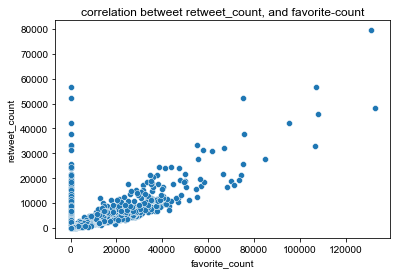

In [148]:
#plots a scatter plot to display the correlation between favorite_count and retweet_count
sns.scatterplot(data=tweet_archive_master, x='favorite_count', y='retweet_count').set(title = 'correlation betweet retweet_count, and favorite-count')
sns.set(rc={'figure.figsize':(15, 10)})

The above scatter plot shows that there is a positive correlation between retweet_counts and favorite_counts. 

__Comment__
The above plot show a positive correlation betweet retweet count and favorite count.

##### 2. Do retweets and favorites increase over time?

In [149]:
#creates resamples of  the retweet_count and favorite_count for a cleaner chart
temp = tweet_archive_master.set_index('timestamp')
retweets = temp['retweet_count'].resample('1w').mean()
favorites= temp['favorite_count'].resample('1w').mean()

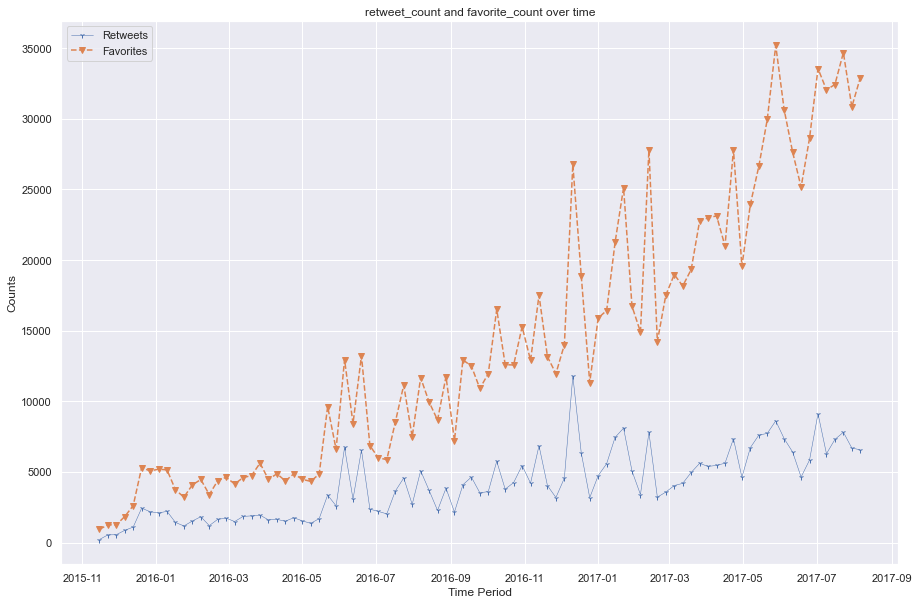

In [150]:
#plots a time series graph for retweet_count and favorite_count as resampled.
sns.set(rc={'figure.figsize':(15, 10)})

fig, ax = plt.subplots()
ax.plot(retweets, marker='1', linestyle='-', linewidth=0.5, label='Retweets')
ax.plot(favorites, marker='v', linestyle='--', label='Favorites')
ax.set(title = 'retweet_count and favorite_count over time')
ax.set_ylabel('Counts')
ax.set_xlabel('Time Period')
ax.legend()

The above line (timeseries) chart shows that both retweets and favorites increas in number over time, with spikes at some moments.

##### 3. What dog stage is most popular?

[Text(0.5, 1.0, 'dog stages distribution')]

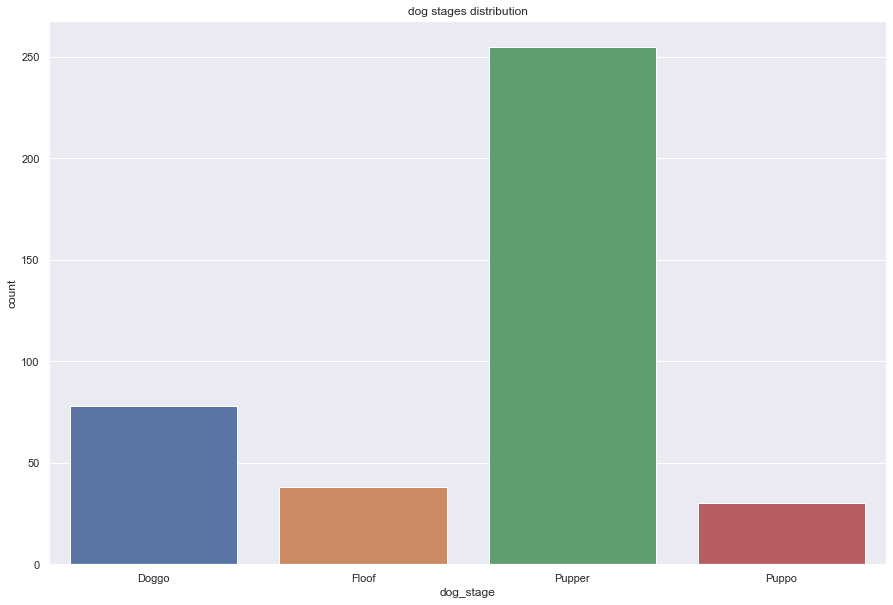

In [151]:
#creates a bar chart of the dog stages founf in the fog_stage column 
sns.countplot(x = 'dog_stage', data = tweet_archive_master).set(title = 'dog stages distribution')


The bar chart above shows `pupper` is the most popular dog stage, followed by `doggo` 

#### 4. What is the most popular tweet source?

[Text(0.5, 1.0, 'Most popular tweet source')]

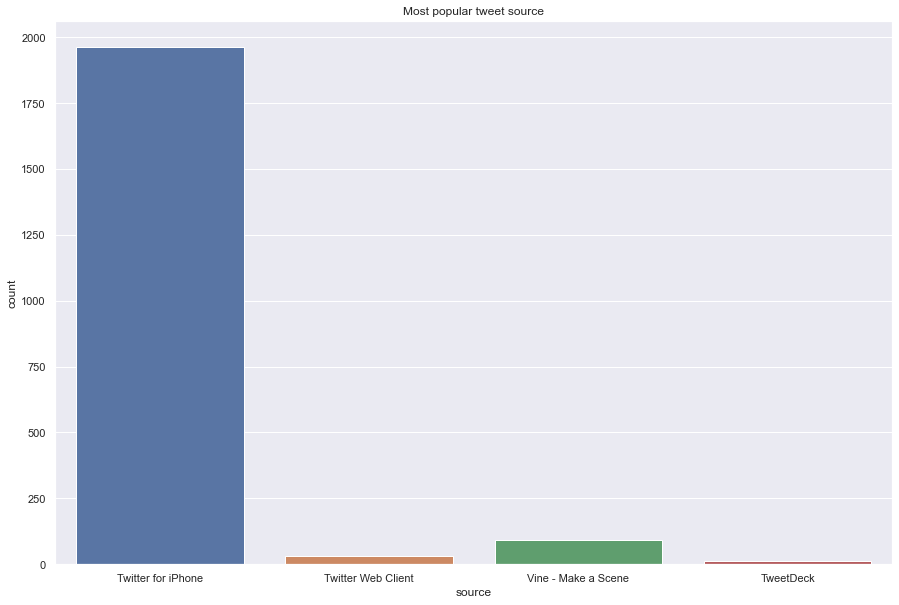

In [152]:
#plots a bar chart for tweet sources found in the source column
sns.countplot(x = 'source', data = tweet_archive_master).set(title='Most popular tweet source')


The bar chart above shows `Twitter for iphone` is the most popular soure of tweets.